In [1]:
# tell python where to find the cnvm package
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

# imports
from cnvm import Parameters, CNVM
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [2]:
num_agents = 100
num_opinions = 3

r_imit = 1
r_noise = 0.01
prob_imit=np.array([[0, .8, .2],
                    [.2, 0, .8],
                    [.8, .2, 0]])
prob_noise = np.array([[0, .9, .7],
                       [.7, 0, .9],
                       [.9, .7, 0]])

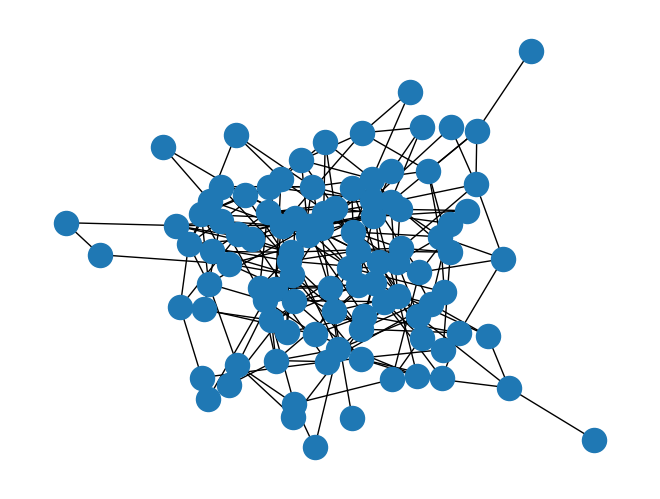

In [18]:
network = nx.erdos_renyi_graph(num_agents, p=0.05)
nx.draw(network)
plt.show()

In [19]:
params = Parameters(num_opinions=num_opinions,
                    network=network,
                    num_agents=num_agents,
                    r_imit=r_imit,
                    r_noise=r_noise,
                    prob_imit=prob_imit,
                    prob_noise=prob_noise)

model = CNVM(params)

In [24]:
x_init = np.concatenate([0 * np.ones(int(20 * num_agents / 100)),
                         1 * np.ones(int(50 * num_agents / 100)),
                         2 * np.ones(int(30 * num_agents / 100))])
t_max = 200
t, x = model.simulate(t_max, x_init=x_init)
print(t.shape)
print(x.shape)

(20159,)
(20159, 100)


In [25]:
from cnvm.collective_variables import OpinionShares
opinion_shares = OpinionShares(num_opinions=num_opinions)
c = opinion_shares(x)
print(c.shape)

(20159, 3)


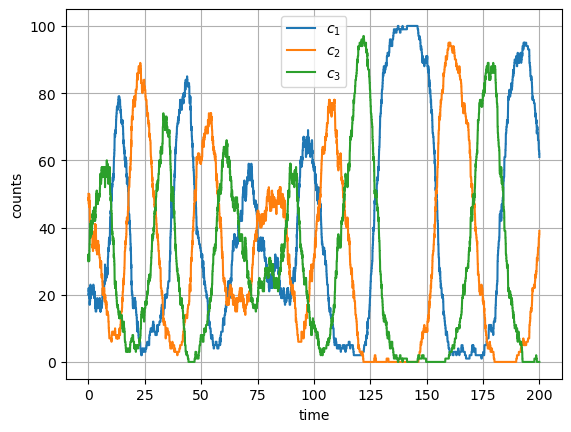

In [26]:
for i in range(c.shape[1]):
    plt.plot(t, c[:, i], label=f"$c_{i+1}$")
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("counts")
plt.show()